In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import datetime
from datetime import timedelta
from dateutil import rrule
import time

plt.rcParams["font.family"] = "sans-serif"

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.despine(left=True)

<Figure size 640x480 with 0 Axes>

### Equity Data Uploading

In [26]:
AMZN = pd.read_csv('Historical_Data_Prices/AMZN.csv')
CMG = pd.read_csv('Historical_Data_Prices/CMG.csv')
DPZ = pd.read_csv('Historical_Data_Prices/DPZ.csv')
EL = pd.read_csv('Historical_Data_Prices/EL.csv')
META = pd.read_csv('Historical_Data_Prices/META.csv')

#### Data Integrity Testing

In [27]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6756 entries, 0 to 6755
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6756 non-null   object 
 1   Open          6756 non-null   float64
 2   High          6756 non-null   float64
 3   Low           6756 non-null   float64
 4   Close         6756 non-null   float64
 5   Volume        6756 non-null   int64  
 6   Dividends     6756 non-null   float64
 7   Stock Splits  6756 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 422.4+ KB


In [28]:
AMZN.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0


In [29]:

# Simplify dataframes to keep only 'Date' and 'Close' columns, and rename 'Close' to the company's ticker for clarity
amzn_df = AMZN[['Date', 'Close']].rename(columns={'Close': 'AMZN'})
cmg_df = CMG[['Date', 'Close']].rename(columns={'Close': 'CMG'})
dpz_df = DPZ[['Date', 'Close']].rename(columns={'Close': 'DPZ'})
el_df = EL[['Date', 'Close']].rename(columns={'Close': 'EL'})
meta_df = META[['Date', 'Close']].rename(columns={'Close': 'META'})

# Convert 'Date' to datetime format for all dataframes
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])
cmg_df['Date'] = pd.to_datetime(cmg_df['Date'])
dpz_df['Date'] = pd.to_datetime(dpz_df['Date'])
el_df['Date'] = pd.to_datetime(el_df['Date'])
meta_df['Date'] = pd.to_datetime(meta_df['Date'])

# Merge all dataframes on 'Date'
merged_df = amzn_df.merge(cmg_df, on='Date', how='outer')\
                   .merge(dpz_df, on='Date', how='outer')\
                   .merge(el_df, on='Date', how='outer')\
                   .merge(meta_df, on='Date', how='outer')

# Sort by 'Date' to ensure chronological order
merged_df = merged_df.sort_values(by='Date').reset_index(drop=True)

merged_df.head()


,Date,AMZN,CMG,DPZ,EL,META
0,1995-11-17 00:00:00-05:00,NaN,NaN,NaN,6.460622,NaN
1,1995-11-20 00:00:00-05:00,NaN,NaN,NaN,6.226541,NaN
2,1995-11-21 00:00:00-05:00,NaN,NaN,NaN,6.109500,NaN
3,1995-11-22 00:00:00-05:00,NaN,NaN,NaN,6.296765,NaN
4,1995-11-24 00:00:00-05:00,NaN,NaN,NaN,6.530845,NaN


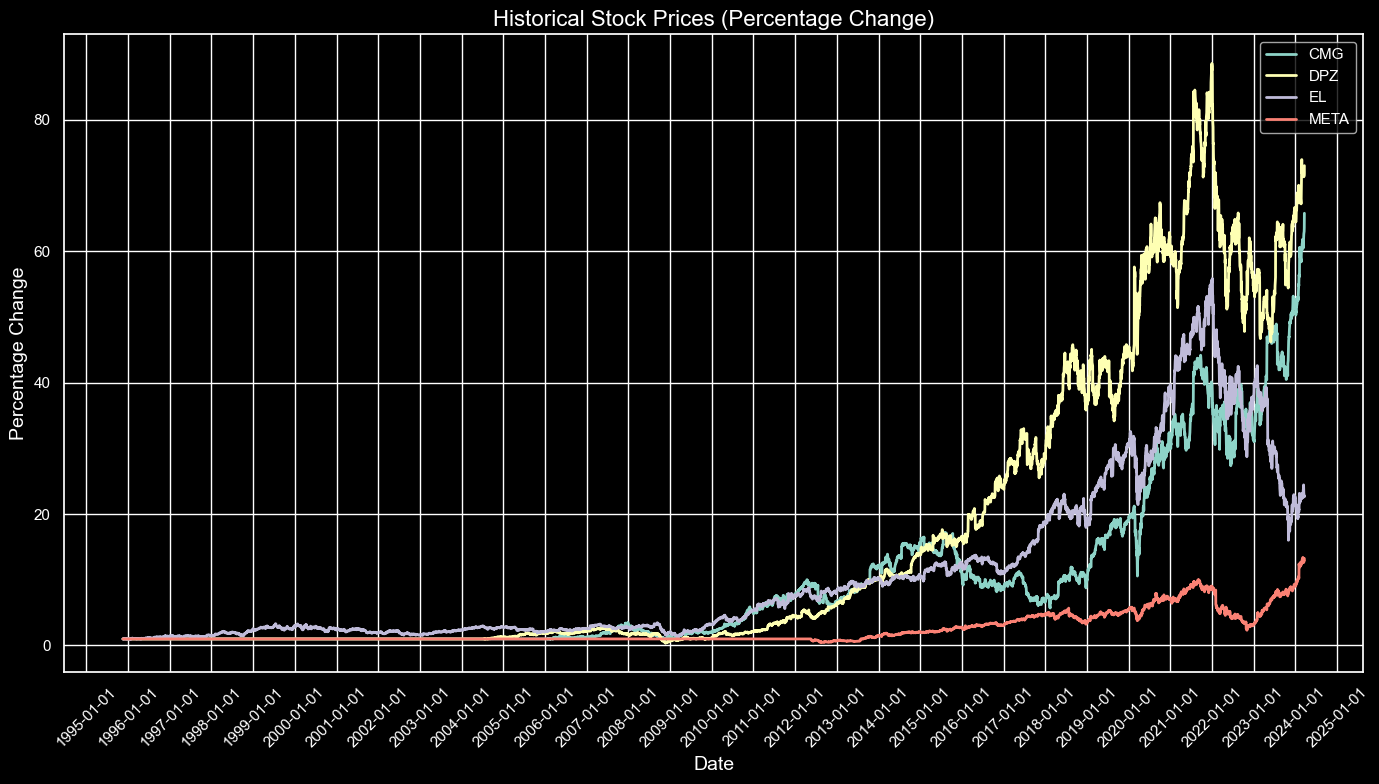

In [31]:
# Calculate the percentage change from the first available price for each stock
merged_pct_change = merged_df.set_index('Date').pct_change().add(1).cumprod().fillna(1)

# Plot the percentage change over time
plt.figure(figsize=(14, 8))
#plt.plot(merged_pct_change.index, merged_pct_change['AMZN'], label='AMZN', linewidth=2)
plt.plot(merged_pct_change.index, merged_pct_change['CMG'], label='CMG', linewidth=2)
plt.plot(merged_pct_change.index, merged_pct_change['DPZ'], label='DPZ', linewidth=2)
plt.plot(merged_pct_change.index, merged_pct_change['EL'], label='EL', linewidth=2)
plt.plot(merged_pct_change.index, merged_pct_change['META'], label='META', linewidth=2)

# Add title and labels
plt.title('Historical Stock Prices (Percentage Change)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage Change', fontsize=14)

# Adjust x-axis date format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())

plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
